# Install image-background-remove-tool

https://github.com/OPHoperHPO/image-background-remove-tool/blob/master/docs/MODELS.md

In [ ]:
#@title Choose branch
branch = 'master'  #@param {type: "string"}
!git clone https://github.com/OPHoperHPO/image-background-remove-tool.git -b $branch
%cd /content/image-background-remove-tool
!pip install -r requirements.txt
!cd ./tools && echo "all" | python setup.py

Cloning into 'image-background-remove-tool'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 1424 (delta 44), reused 58 (delta 18), pack-reused 1313
Receiving objects: 100% (1424/1424), 102.07 MiB | 21.20 MiB/s, done.
Resolving deltas: 100% (478/478), done.
/content/image-background-remove-tool
     |████████████████████████████████| 122kB 12.7MB/s 
     |████████████████████████████████| 20.2MB 1.2MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 752.0MB 19kB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
     |████████████████████████████████| 34.2MB 83kB/s 
     |████████████████████████████████| 516.2MB 17kB/s 
     |████████████████████████████████| 757kB 48.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |███████████████████████

Choose which model you want to install:
u2net
basnet
u2netp
xception_model
mobile_net_model
all
Enter model name: Create folders
Start download model archives!
Downloading...
From: https://github.com/OPHoperHPO/image-background-remove-tool/releases/download/3.2/deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz
To: /content/image-background-remove-tool/models/mobile_net_model/model.tar.gz
100% 23.9M/23.9M [00:01<00:00, 20.2MB/s]
Downloading...
From: https://github.com/OPHoperHPO/image-background-remove-tool/releases/download/3.2/deeplabv3_pascal_train_aug_2018_01_04.tar.gz
To: /content/image-background-remove-tool/models/xception_model/model.tar.gz
100% 460M/460M [00:14<00:00, 30.9MB/s]
Downloading...
From: https://github.com/OPHoperHPO/image-background-remove-tool/releases/download/3.2/u2net.pth
To: /content/image-background-remove-tool/models/u2net/u2net.pth
100% 176M/176M [00:05<00:00, 32.9MB/s]
Downloading...
From: https://github.com/OPHoperHPO/image-background-remove-tool/releases/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Try

https://github.com/OPHoperHPO/image-background-remove-tool/raw/master/docs/imgs/input/4.jpg

In [ ]:
import os
import re
import pandas as pd
from PIL import Image
from IPython.display import display
import shutil 


In [ ]:
savedir = '/content/drive/My Drive/Colab Notebooks/eva/eva5/week15/rembgimgout'

In [ ]:
def removeBackground(savedir , name):

  preprocessing = "bbd-fastrcnn" 
  model_name = "u2net" 
  postprocessing = "rtb-bnb" 

  if os.path.exists("./1.jpg"):
    f = "1.jpg"
    !python main.py -i ./1.jpg -o ./2.png -m $model_name -prep $preprocessing -postp $postprocessing
  
    image = Image.open("./2.png")
    savepath = os.path.join(savedir, name + '.png')
    image.save(savepath)
  

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/eva/eva5/week15/image'
VALIDEXTN = ['.jpg','.png']
def readFilesAndCeateBackgroundImage(path,savedir):
    
    oldnameList = []
    newnameList = []
    
    
    
    i = 0
    for root, dirs, files in os.walk(path):
        for file in files:
            print(file)
            name , extn = os.path.splitext(file)
            
            if (extn in VALIDEXTN ):
                
                filepath = os.path.join(root, file)
                print(filepath)
                destination = '/content/image-background-remove-tool/1.jpg'
                shutil.copy(filepath, destination) 
                removeBackground(savedir , name)
                i += 1

                print(i)
                
readFilesAndCeateBackgroundImage(path,savedir) 

image-2324.jpg
/content/drive/My Drive/Colab Notebooks/eva/eva5/week15/image/image-2324.jpg
121888KB [00:04, 28559.57KB/s]                
1
image-3151.jpg
/content/drive/My Drive/Colab Notebooks/eva/eva5/week15/image/image-3151.jpg
2
image-2325.jpg
/content/drive/My Drive/Colab Notebooks/eva/eva5/week15/image/image-2325.jpg
3
image-2334.jpg
/content/drive/My Drive/Colab Notebooks/eva/eva5/week15/image/image-2334.jpg
4
image-2339.jpg
/content/drive/My Drive/Colab Notebooks/eva/eva5/week15/image/image-2339.jpg
5
image-3243.jpg
/content/drive/My Drive/Colab Notebooks/eva/eva5/week15/image/image-3243.jpg
6
image-2333.jpg
/content/drive/My Drive/Colab Notebooks/eva/eva5/week15/image/image-2333.jpg
7
image-2322.jpg
/content/drive/My Drive/Colab Notebooks/eva/eva5/week15/image/image-2322.jpg
8
image-2330.jpg
/content/drive/My Drive/Colab Notebooks/eva/eva5/week15/image/image-2330.jpg
9
image-2323.jpg
/content/drive/My Drive/Colab Notebooks/eva/eva5/week15/image/image-2323.jpg
10
image-2336.j

In [ ]:
#%cp '/content/image-004.jpg' /content/image-background-remove-tool/1.jpg 

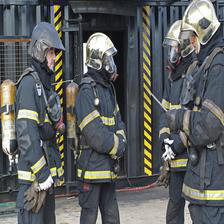

./2.png


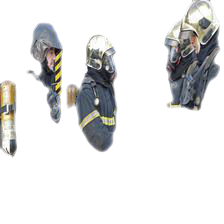

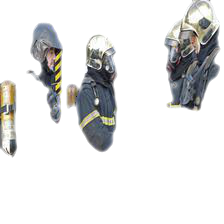

In [ ]:
#@title Try it yourself
#@markdown Choose a model and algorithms to improve the result
img_url = 'https://github.com/OPHoperHPO/image-background-remove-tool/raw/master/docs/imgs/input/3.jpg'  #@param {type: "string"}
preprocessing = "bbd-fastrcnn" #@param ["bbd-fastrcnn", "bbmd-maskrcnn", "None"] {allow-input: false}
model_name = "u2net" #@param ["u2net", "basnet", "u2netp", "mobile_net_model", "xception_model"] {allow-input: false}
postprocessing = "rtb-bnb" #@param ["rtb-bnb", "rtb-bnb2", "No"] {allow-input: false}
#!wget -q -O ./1.jpg "$img_url"  > /dev/null

from IPython.display import display
from PIL import Image
import os

savedir = '/content/drive/My Drive/Colab Notebooks/eva/eva5/week15/rembgimgout'
display(Image.open("./1.jpg"))
if os.path.exists("./1.jpg"):
  f = "1.jpg"
  print("./2.png")
  !python main.py -i ./1.jpg -o ./2.png -m $model_name -prep $preprocessing -postp $postprocessing
  image = Image.open("./2.png")
  savepath = os.path.join(savedir, 'image-004.png')
  image.save(savepath)#,'JPEG')
  new = Image.new("RGB", image.size, (255, 255, 255))
  new.paste(image, (0,0), image)
  display(new)
  display(image)